In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

# Load the pickled data without the new individuals added in the previous notebook.

G = nx.read_gpickle('Synthetic Social Network.pkl')

# Hubs: How do we evaluate the importance of some individuals in a network?

Within a social network, there will be certain individuals which perform certain important functions. For example, there may be hyper-connected individuals who are connected to many, many more people. They would be of use in the spreading of information. Alternatively, if this were a disease contact network, identifying them would be useful in stopping the spread of diseases. How would one identify these people?

## Approach 1: Neighbors

One way we could compute this is to find out the number of people an individual is conencted to. NetworkX let's us do this by giving us a `G.neighbors(node)` function.

In [2]:
# Let's find out the number of neighbors that individual #7 has.
G.neighbors(9)

[24, 17, 11]

### Exercise

Can you create a ranked list of the importance of each individual, based on the number of neighbors they have? 

Hint: One suggested output would be a list of tuples, where the first element in each tuple is the node ID (an integer number), and the second element is a list of its neighbors.

Hint: Python's `sorted(iterable, key=lambda x:...., reverse=True)` function may be of help here.

In [3]:
# Possible Answers:
sorted([n for n in G.nodes()], key=lambda x:len(G.neighbors(x)), reverse=True)
sorted([(n, G.neighbors(n)) for n in G.nodes()], key=lambda x: len(x[1]), reverse=True)

[(19, [0, 16, 2, 4, 22, 17, 27, 12]),
 (1, [4, 2, 3, 12, 29]),
 (2, [16, 1, 3, 6, 19]),
 (3, [8, 1, 2, 6, 23]),
 (17, [8, 9, 19, 14, 16]),
 (12, [0, 1, 19, 29]),
 (14, [17, 11, 13, 25]),
 (16, [17, 2, 19, 13]),
 (24, [9, 7, 13, 15]),
 (0, [10, 19, 12]),
 (4, [1, 19, 28]),
 (6, [2, 3, 23]),
 (8, [17, 3, 22]),
 (9, [24, 17, 11]),
 (10, [0, 11, 21]),
 (11, [9, 10, 14]),
 (13, [16, 24, 14]),
 (21, [10, 27, 26]),
 (23, [3, 20, 6]),
 (25, [28, 14, 7]),
 (27, [19, 20, 21]),
 (28, [25, 4, 15]),
 (29, [1, 26, 12]),
 (7, [24, 25]),
 (15, [24, 28]),
 (20, [27, 23]),
 (22, [8, 19]),
 (26, [21, 29]),
 (5, []),
 (18, [])]

## Approach 2: Degree Centrality

The number of other nodes that one node is connected to is a measure of its centrality. NetworkX implements a **degree centrality**, which is defined as the number of neighbors that a node has normalized to the number of individuals it could be connected to in the entire graph. This is accessed by using `nx.degree_centrality(G)`

In [4]:
nx.degree_centrality(G)

{0: 0.10344827586206896,
 1: 0.1724137931034483,
 2: 0.1724137931034483,
 3: 0.1724137931034483,
 4: 0.10344827586206896,
 5: 0.0,
 6: 0.10344827586206896,
 7: 0.06896551724137931,
 8: 0.10344827586206896,
 9: 0.10344827586206896,
 10: 0.10344827586206896,
 11: 0.10344827586206896,
 12: 0.13793103448275862,
 13: 0.10344827586206896,
 14: 0.13793103448275862,
 15: 0.06896551724137931,
 16: 0.13793103448275862,
 17: 0.1724137931034483,
 18: 0.0,
 19: 0.27586206896551724,
 20: 0.06896551724137931,
 21: 0.10344827586206896,
 22: 0.06896551724137931,
 23: 0.10344827586206896,
 24: 0.13793103448275862,
 25: 0.10344827586206896,
 26: 0.06896551724137931,
 27: 0.10344827586206896,
 28: 0.10344827586206896,
 29: 0.10344827586206896}

If you inspect the dictionary closely, you will find that node 19 is the one that has the highest degree centrality, just as we had measured by counting the number of neighbors.

There are other measures of centrality, namely **betweenness centrality**, **flow centrality** and **load centrality**. You can take a look at their definitions on the NetworkX API docs and their cited references. You can also define your own measures if those don't fit your needs, but that is an advanced topic that won't be dealt with here.

The NetworkX API docs that document the centrality measures are here: http://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.centrality.html

### Exercises

1. Can you create a histogram of the distribution of degree centralities?
2. Can you create a histogram of the distribution of number of neighbors?
3. Can you create a scatterplot of the degree centralities against number of neighbors?
4. If I have `n` nodes, then how many possible edges are there in total, assuming self-edges are allowed? What if self-edges are not allowed?

Hint: You may want to use:

    plt.hist(list_of_values)

and 

    plt.scatter(x_values, y_values)

If you know the Matplotlib API, feel free to get fancy :).

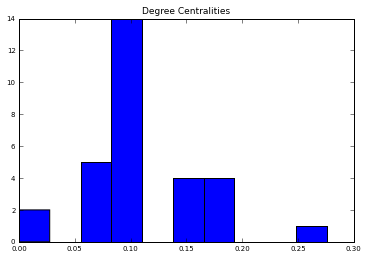

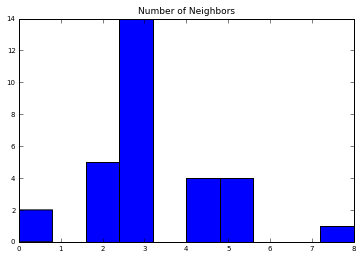

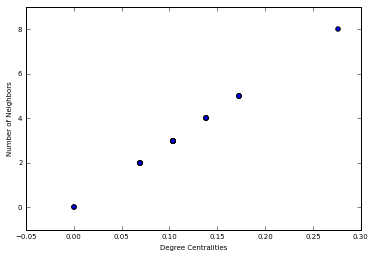

In [5]:
# Possible Answers:
fig = plt.figure(0)
degree_centralities = [v for k, v in nx.degree_centrality(G).items()]
plt.hist(degree_centralities)
plt.title('Degree Centralities')

fig = plt.figure(1)
neighbors = [len(G.neighbors(node)) for node in G.nodes()]
plt.hist(neighbors)
plt.title('Number of Neighbors')

fig = plt.figure(2)
plt.scatter(degree_centralities, neighbors)
plt.xlabel('Degree Centralities')
plt.ylabel('Number of Neighbors')

# Paths in a Network

Graph traversal is akin to walking along the graph, node by node, restricted by the edges that connect the nodes. Graph traversal is particularly useful for understanding the local structure (e.g. connectivity, retrieving the exact relationships) of certain portions of the graph and for finding paths that connect two nodes in the network. 

Using the synthetic social network, we will figure out how to answer the following questions:

1. How long will it take for a message to spread through this group of friends? (making some assumptions, of course)
2. How do we find the shortest path to get from individual A to individual B?

## Shortest Path

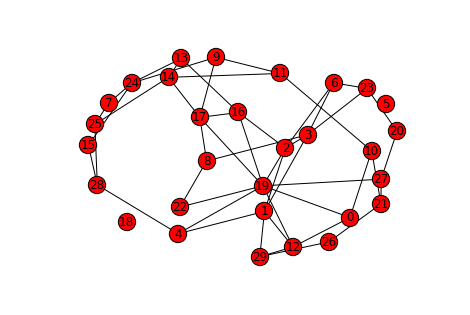

In [6]:
nx.draw(G, with_labels=True)

Let's say we wanted to find the shortest path between two nodes. How would we approach this? One approach is what one would call a **breadth-first search** (http://en.wikipedia.org/wiki/Breadth-first_search). While not necessarily the fastest, it is the easiest to conceptualize. 

The approach is essentially as such:

1. Begin with a queue of the starting node.
2. Add the neighbors of that node to the queue.
    1. If destination node is present in the queue, end.
    2. If destination node is not present, proceed.
3. For each node in the queue:
    1. Remove node from the queue.
    2. Add neighbors of the node to the queue. Check if destination node is present or not.
    3. If destination node is present, repeat Step 3.
    4. If destination node is not present, continue.
    
### Exercise

Try implementing this algorithm in a function called `path_exists(node1, node2, G)`.

The function should take in two nodes, `node1` and `node2`, and the graph `G` that they belong to, and return a Boolean that indicates whether a path exists between those two nodes or not.

In [7]:
def path_exists(node1, node2, G):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    queue = [node1]
    destination = node2
    
    for node in queue:
        neighbors = G.neighbors(node)
        if destination in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break
        else:
            queue.remove(node)
            queue.extend(neighbors)
        if len(queue) == 0:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))
            return False
    

And testing the function on a few test cases:

- 18 and any other node (should return `False`)
- 29 and 26 (should return `True`)

In [8]:
path_exists(18, 5, G)
path_exists(29, 26, G)

Path does not exist between nodes 18 and 5
Path exists between nodes 29 and 26


True

If you write an algorithm that runs breadth-first, the recursion pattern is likely to follow what we have done above. If you do depth-first, the recursion pattern is likely to look a bit different. We can figure that out together later, if there is time.

Meanwhile... thankfully, NetworkX has a function for us to use, titled `has_path`, so we don't have to implement this on our own. :-)

http://networkx.lanl.gov/reference/generated/networkx.algorithms.shortest_paths.generic.has_path.html#networkx.algorithms.shortest_paths.generic.has_path

In [9]:
nx.has_path(G, 18, 5)

False

NetworkX also has other shortest path algorithms implemented. 

https://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.shortest_paths.unweighted.predecessor.html#networkx.algorithms.shortest_paths.unweighted.predecessor

We can build upon these to build our own graph query functions. Let's see if we can trace the shortest path from one node to another.

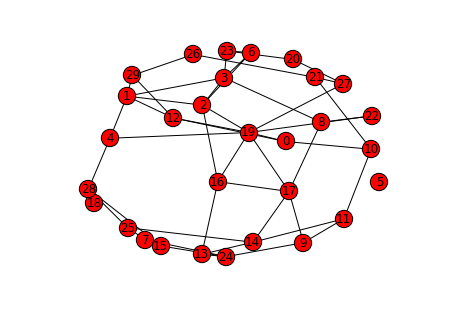

In [10]:
nx.draw(G, with_labels=True)

`nx.shortest_path(G, source, target)` gives us a list of nodes that exist within one of the shortest paths between the two nodes. (Not all paths are guaranteed to be found.)

In [11]:
nx.shortest_path(G, 4, 14)

[4, 19, 17, 14]

Incidentally, the node list is in order as well - we will travel through 19 and 17 in that order to get from 14 from 4.

### Exercise

Write a function that extracts the edges in the shortest path between two nodes and puts them into a new graph, and draws it to the screen. It should also return an error if there is no path between the two nodes.

Hint: You may want to use `G.subgraph(iterable_of_nodes)` to extract just the nodes and edges of interest from the graph `G`. You might want to use the following line of code somewhere:

    newG = G.subgraph(nodes_of_interest)
    
newG will be comprised of the nodes of interest and the edges that connect them.

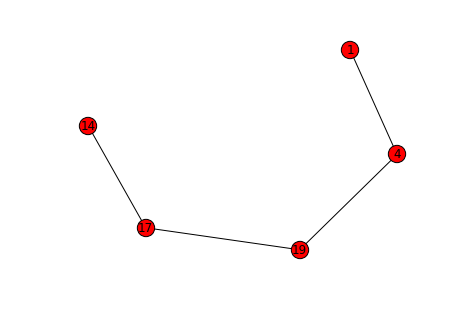

In [12]:
# Possible Answer:

def extract_path_edges(G, source, target):
    # Check to make sure that a path does exists between source and target.
    if nx.has_path(G, source, target) == True:
        nodes = nx.shortest_path(G, source, target)
        newG = G.subgraph(nodes)
        return newG

    if nx.has_path(G, source, target) == False:
        raise Exception('Path does not exist between nodes {0} and {1}.'.format(source, target))
        
newG = extract_path_edges(G, 1, 14)
nx.draw(newG, with_labels=True)

### Exercise

Since we've been drawing some graphs to screen, we might as well draw a few other things while we're on a roll.

Write a function that extracts only node, its neighbors, and the edges between that node and its neighbors as a new graph. Then, draw the new graph to screen.

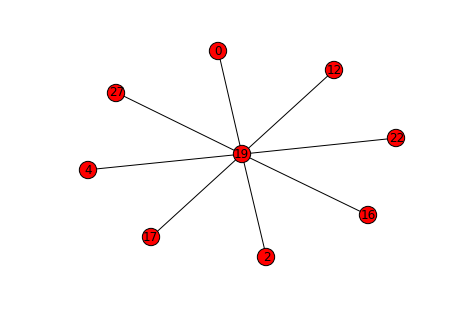

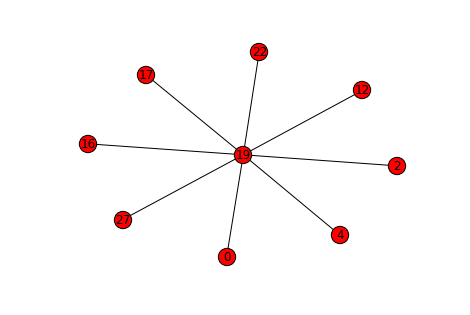

In [13]:
# Possible Answer

def extract_neighbor_edges(G, node):
    neighbors = G.neighbors(node)
    newG = nx.Graph()
    
    for n1, n2 in G.edges():
        if (n1 == node and n2 in neighbors) or (n1 in neighbors and n2 == node):
            newG.add_edge(n1, n2)
            
    return newG

def extract_neighbor_edges2(G, node):
    neighbors = G.neighbors(node)
    newG = nx.Graph()
    
    for neighbor in neighbors:
        if (node, neighbor) in G.edges() or (neighbor, node) in G.edges():
            newG.add_edge(node, neighbor)

    return newG

fig = plt.figure(0)
newG = extract_neighbor_edges(G, 19)
nx.draw(newG, with_labels=True)

fig = plt.figure(1)
newG = extract_neighbor_edges2(G, 19)
nx.draw(newG, with_labels=True)

### Challenge Exercises (optional)

Let's try some other problems that build on the NetworkX API. (10 min.)

Refer to the following for the relevant functions:

https://networkx.github.io/documentation/latest/reference/algorithms.shortest_paths.html

1. If we want a message to go from one person to another person, and we assume that the message takes 1 day for the initial step and 1 additional day per step in the transmission chain (i.e. the first step takes 1 day, the second step takes 2 days etc.), how long will the message take to spread from any two given individuals? Write a function to compute this.
2. What is the distribution of message spread times from person to person? What about chain lengths?
3. Are there certain individuals who consistently show up in the chain? (Hint: you might wish to use the following functions/objects:
    1. `Counter` object from the `collections` module 
    2. `combinations` function from the `itertools` module.
    3. `all_shortest_paths(G, node1, node2)` which is part of the networkX algorithms.
4. As a bonus, if you were able to compute the answer to question 3, can you plot a histogram of the number of times each node shows up in a connecting path?

In [14]:
# Possible answer to Question 1:
# All we need here is the length of the path.

def compute_transmission_time(G, source, target):
    """
    Fill in code below.
    """
    length = nx.shortest_path_length(G, source, target)
    
    time = sum([i for i in range(1, length+1)])
    
    return time

compute_transmission_time(G, 14, 4)       

6

<Container object of 7 artists>

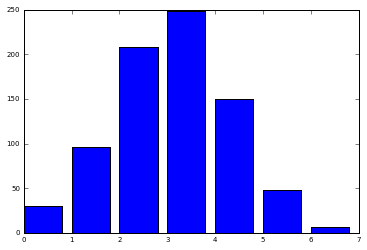

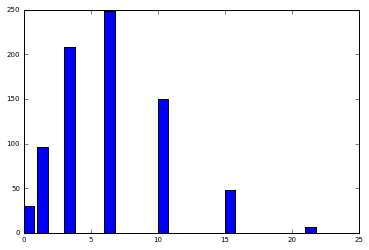

In [15]:
# Possible answer to Question 2:
# We need to know the length of every single shortest path between every pair of nodes.
# If we don't put a source and target into the nx.shortest_path_length(G) function call, then
# we get a dictionary of dictionaries, where all source-->target-->lengths are shown.

lengths = []
times = []
for source, sink_length in nx.shortest_path_length(G).items():
    for sink, length in sink_length.items():
        times.append(sum(range(1, length+1)))
        lengths.append(length)
        
plt.figure(0)
plt.bar(Counter(lengths).keys(), Counter(lengths).values())

plt.figure(1)
plt.bar(Counter(times).keys(), Counter(times).values())

In [16]:
# Possible answer to Question 3:
from collections import Counter
from itertools import combinations

totals = Counter()
for n1, n2 in combinations(G.nodes(), 2):
    if nx.has_path(G, n1, n2):
        for path in nx.all_shortest_paths(G, n1, n2):
            path.pop(0)
            path.pop(-1)
            totals = totals + Counter(path)
            
totals

Counter({19: 203, 17: 136, 4: 80, 2: 79, 14: 75, 16: 70, 1: 68, 3: 59, 28: 58, 9: 54, 27: 54, 24: 46, 13: 42, 25: 41, 8: 40, 10: 39, 11: 36, 12: 32, 21: 28, 0: 24, 29: 24, 20: 11, 23: 11, 6: 8, 22: 8, 26: 8, 15: 6, 7: 2})

<Container object of 28 artists>

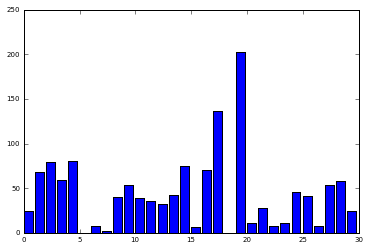

In [17]:
# Possible answer to Question 4:
plt.bar(totals.keys(), totals.values())

# Hubs Revisited

It looks like individual 19 is an important person of some sorts - if a message has to be passed through the network in the shortest time possible, then usually it'll go through person 19. Such a person has a high **betweenness centrality**. This is implemented as one of NetworkX's centrality algorithms. Check out the Wikipedia page for a further description.

http://en.wikipedia.org/wiki/Betweenness_centrality

<Container object of 30 artists>

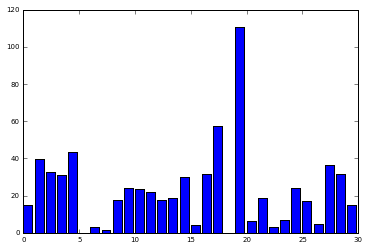

In [18]:
btws = nx.betweenness_centrality(G, normalized=False)
plt.bar(btws.keys(), btws.values())

### Exercise

Plot betweeness centrality against degree centrality for the synthetic social network above.

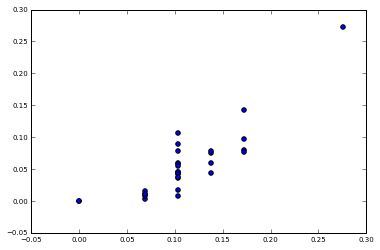

In [19]:
# Possible answer:

deg_centrality = nx.degree_centrality(G)
btw_centrality = nx.betweenness_centrality(G)

deg_cent_sorted = [i[1] for i in sorted(zip(deg_centrality.keys(), deg_centrality.values()))]
btw_cent_sorted = [i[1] for i in sorted(zip(btw_centrality.keys(), btw_centrality.values()))]

plt.scatter(deg_cent_sorted, btw_cent_sorted)

**Think about it...**

From the scatter plot, we can see that the dots don't all fall on the same line. Degree centrality and betweenness centrality don't necessarily correlate. Can you think of a reason why?

What would be the degree centrality and betweenness centrality of the middle connecting node in the **barbell graph** below?

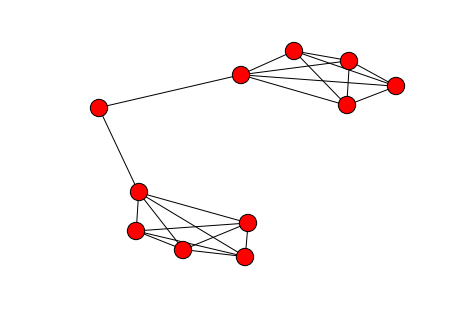

In [20]:
nx.draw(nx.barbell_graph(5, 1))